In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('./antipsychotic_medication_washout.txt', sep='\t', header=None)

In [7]:
data
data.drop(0, axis=1, inplace=True)
data.head()

,1,2,3,4,5
0,1.0,4.0,0.0,0.0,0.0
1,4.0,5.0,8.0,9.0,3.0
2,1.0,2.0,2.0,1.0,1.0
3,8.0,7.0,0.0,5.0,5.0
4,1.0,1.0,0.0,1.0,1.0


In [10]:
means = data.mean().values

In [13]:
means = data.mean().values
glob_mean = data.values.mean()
glob_mean

2.3045454545454547

In [11]:
data.shape

(44, 5)

In [12]:
k = 5
n = 44

In [119]:
(data.values - means)[:5]

array([[-1.95454545,  1.59090909, -2.11363636, -2.25      , -1.79545455],
       [ 1.04545455,  2.59090909,  5.88636364,  6.75      ,  1.20454545],
       [-1.95454545, -0.40909091, -0.11363636, -1.25      , -0.79545455],
       [ 5.04545455,  4.59090909, -2.11363636,  2.75      ,  3.20454545],
       [-1.95454545, -1.40909091, -2.11363636, -1.25      , -0.79545455]])

In [27]:
 (1/(k - 1) * n * np.sum((means - glob_mean) ** 2 ))

8.0522727272727277

In [30]:
(1 /(n * k - k) * np.sum((data.values - means) ** 2))

15.08086680761099

In [31]:
R = (1/(k - 1) * n * np.sum((means - glob_mean) ** 2 ) /  (1 /(n * k - k) * np.sum((data.values - means) ** 2)))

In [35]:
R

0.53393964882767342

In [34]:
sps.f(4, 44 * 5 - 5).ppf(0.95)

2.4136389417602873

In [37]:
np.argsort(means)

array([4, 2, 3, 1, 0])

# DASKJDQWOIJDIOQWJDIOQWD


In [41]:
data_2 = pd.read_csv('./antipsychotic_medication_washout2.txt', sep=' ',header=None)

In [45]:
data_2.shape

(44, 5)

In [43]:
data_2.head()

,0,1,2,3,4
0,1.0,4.0,5.0,0.0,0.0
1,4.0,5.0,13.0,9.0,3.0
2,1.0,2.0,7.0,1.0,1.0
3,8.0,7.0,5.0,5.0,5.0
4,1.0,1.0,5.0,1.0,1.0


In [49]:
means_2 = data_2.mean().values
glob_mean_2 = data_2.values.mean()

In [50]:
R = (1/(k - 1) * n * np.sum((means_2 - glob_mean_2) ** 2 ) /  (1 /(n * k - k) * np.sum((data_2.values - means_2) ** 2)))
R

13.729467633967685

In [51]:
sps.f(4, 44 * 5 - 5).ppf(0.95)

2.4136389417602873

In [52]:
np.argsort(means_2)

array([4, 3, 1, 0, 2])

In [53]:
srtd_means = np.argsort(means_2)


In [86]:
srtd_means

array([4, 3, 1, 0, 2])

In [89]:
rejected = []
for i in range(1, k):
    cur_fst = srtd_means[i - 1]
    cur_snd = srtd_means[i]
    stat = means_2[cur_fst] - means_2[cur_snd]
    crit = sps.t(n * k - k).ppf(0.95) * np.sqrt(2 / n * (1 /(n * k - k) * np.sum((data_2.values - means_2) ** 2)))
    if stat >= crit:
        rejected.append(i)

In [90]:
rejected

[]

In [57]:
data[[1,3]].mean()

1    2.954545
3    2.113636
dtype: float64

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

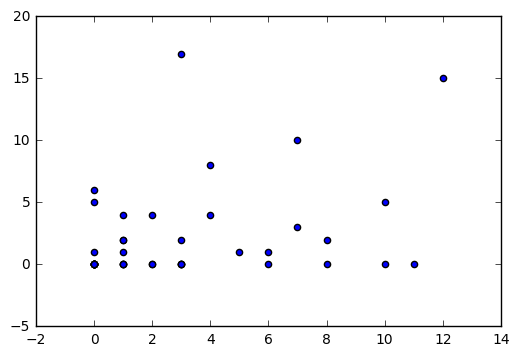

In [60]:
plt.scatter(data[1], data[3])
plt.show()

## HST

In [75]:
varss = data_2.var()
varss

0    11.858351
1    16.665962
2    14.986786
3    18.796512
4    13.096723
dtype: float64

In [76]:
B = (1 / (n * k - k) * (n - 1) * np.sum(varss)) / (np.prod(varss ** (n - 1))) ** (1/(n * k))
B

1.0777419512613104

In [77]:
gamma = 1 + 1 / (3 * k - 1) * (k / n - 1/(n * k))

In [78]:
B_hat = ((n * k -  k) * np.log(B)) / gamma
B_hat

15.972175789768864

In [79]:
sps.chi2(4).ppf(0.95)

9.487729036781154

In [83]:
data_2.head()

,0,1,2,3,4
0,1.0,4.0,5.0,0.0,0.0
1,4.0,5.0,13.0,9.0,3.0
2,1.0,2.0,7.0,1.0,1.0
3,8.0,7.0,5.0,5.0,5.0
4,1.0,1.0,5.0,1.0,1.0


In [82]:
data.head()

,1,2,3,4,5
0,1.0,4.0,0.0,0.0,0.0
1,4.0,5.0,8.0,9.0,3.0
2,1.0,2.0,2.0,1.0,1.0
3,8.0,7.0,0.0,5.0,5.0
4,1.0,1.0,0.0,1.0,1.0


In [84]:
data_2.head()

,0,1,2,3,4
0,1.0,4.0,5.0,0.0,0.0
1,4.0,5.0,13.0,9.0,3.0
2,1.0,2.0,7.0,1.0,1.0
3,8.0,7.0,5.0,5.0,5.0
4,1.0,1.0,5.0,1.0,1.0


In [102]:
from itertools import combinations
from tqdm import tqdm

In [115]:
sps.bartlett(list(data_2.values.T))

ValueError: Must enter at least two input sample vectors.

In [116]:
rejected = []
for pair in tqdm(combinations(range(k), 2)):
    cur_fst = pair[0]
    cur_snd = pair[1]
    stat = abs(means_2[pair[0]] - means_2[pair[1]])
    curmean = np.array([data_2[cur_fst], data_2[cur_snd]]).mean()
    crit = np.sqrt(2 / (n * k)) * 3.67 * (1 / (2*n - 1) * (np.sum((data_2[cur_fst] - curmean) ** 2) + np.sum((data_2[cur_snd] - curmean) ** 2)))
    if stat >= crit:
        rejected.append(i)

10it [00:00, 1286.32it/s]


In [117]:
data_2.mean()

0    2.954545
1    2.409091
2    7.113636
3    2.250000
4    1.795455
dtype: float64

In [118]:
rejected

[]